# Problem 1:

Question: 

Suppose a logistic model has been fitted to a data set and the ROC curve has been plotted. If the point
with sensitivity = α and specificity = β is on the curve, what are the smallest and largest values for the area
under the curve?

Answer:

The ROC curve is used to show the perfomance of a classification model. In the ROC curve a line is drawn beginning at point [0,0] and ending at [1,1] and because the worst performance is a straight line from one point to the other the minimum is 0.5. Because the best classifier is at goes through [0,1] the maximum is 1.

# Problem 2: 

Question:

We’ll use the MNIST image classification data, available as mnist_all.RData. For this problem we want to distinguish between 1 and 3. Filter the train data to only include digits 1 and 3. Remove all variables (pixels)
that have zero variance, i.e. pixels that have the same value for both digits. Repeat this for the test data.
It’s recommended to write a function that you can run on both datasets.

In this problem, you will do two forward selection steps for finding good logistic models.

## part a: 

Find the pixel that gives the best logistic model for the training data, using the area under the ROC curve as the criterion. Do this with a complete search. Do not show the output of all logistic models.

In [80]:
#open mnist_all.RData
load("mnist_all.RData")

In [81]:
ls()

[1] "auc.list1"      "auc2c"          "auc2d"          "auc3b"         
 [5] "auc3c"          "auc3d"          "auc4c"          "auc4d"         
 [9] "Boston"         "ctrl"           "image"          "index.13.test" 
[13] "index.13.train" "index.47.test"  "index.47.train" "indx"          
[17] "lda_mod"        "log_mod"        "mod_mat"        "mod_mat_test"  
[21] "mod_nn"         "mod_nn_2"       "mod_nn_3"       "mod_nn_4"      
[25] "pred_lda"       "pred_log"       "pred_qda"       "preds_nn_2"    
[29] "preds_nn_3"     "preds_nn_4"     "predsnn"        "qda_mod"       
[33] "rmse2"          "rmse3"          "rmse4"          "roc_lda"       
[37] "roc_log"        "roc_qda"        "test"           "test.13"       
[41] "test.47"        "test_highcrime" "test_pred2"     "test_pred3"    
[45] "test_pred4"     "threshold"      "train"          "train.13"      
[49] "train.47"       "z"              "z_test"

In [82]:
index.13.train <- train$y == 1 | train$y == 3
train.13 <- as.data.frame(train$x[index.13.train,])
train.13$z <- as.numeric(train$y[index.13.train] == 3)
index.13.test <- test$y == 1 | test$y == 3
test.13 <- as.data.frame(test$x[index.13.test,])
test.13$z <- as.numeric(test$y[index.13.test] == 3)

In [83]:
#get the dimesion of the data
dim(train.13)

[1] 12873   785

In [84]:
head(train.13)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V776,V777,V778,V779,V780,V781,V782,V783,V784,z
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [85]:
auc.list1 = numeric(ncol(train.13)-1)
length(auc.list1)

[1] 784

In [86]:
#show the mnist data
library(pROC)
for (i in 1:(ncol(train.13)-1)){
    mod1 = glm(z~train.13[,i], family=binomial, data=train.13)
    preds1 = predict(mod1, newdata=train.13, type="response")
    auc.list1[i] = roc(train.13$z, preds1)$auc
}

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient

: 

: 

In [ ]:
best.var1 = names(train.13)[which.max(auc.list1)]
best.auc1 = max(auc.list1)
best.var1
best.auc1

[1] "V490"

[1] 0.9438168

##  part b: 

Now find one more pixel such that the resulting logistic model using the pixel from
part a together with the new one has the best area under the ROC curve. Do this with a
complete search. Minimize the output.


In [ ]:
auc.list2 = numeric(ncol(train.13)-1)
length(auc.list2)

[1] 784

Code block: below was my inital interpretation of the question, but it was taking way too long so I think I was goind the wrong direction. Instead I'm using the complete search above to find the second best pixel for the time being. If I have time I'll run this later. 

In [ ]:
for (i in 1:(ncol(train.13)-1)){
    mod2 = glm(z~train.13[,490] + train.13[,i], family=binomial, data=train.13)
    preds2 = predict(mod2, newdata=train.13, type="response")
    auc.list2[i] = roc(train.13$z, preds2)$auc
}

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient

In [ ]:
best.var2 = names(train.13)[which.max(auc.list2)]
best.auc2 = max(auc.list2)
best.var2
best.auc2

[1] "V495"

[1] 0.974748

This code block below is just left here for reference, please ignore.

## Part c:

part c: Use the test data to decide whether the second model is really better than the first one

In [ ]:
mod1c = glm(z~train.13[,490], family=binomial, data=train.13)
mod2c = glm(z~train.13[,490]+train.13[,495], family=binomial, data=train.13)

In [ ]:
#predict the test data with model 1 and 2
preds1c = predict(mod1c, newdata=test.13, type="response")
preds2c = predict(mod2c, newdata=test.13, type="response")

Warning message:
"'newdata' had 2145 rows but variables found have 12873 rows"
Warning message:
"'newdata' had 2145 rows but variables found have 12873 rows"


In [ ]:
#get the rmse for model 1 and 2
rmse1 = sqrt(mean((test.13$z - preds1c)^2))
rmse2 = sqrt(mean((test.13$z - preds2c)^2))
print(rmse1)
print(rmse2)

Warning message in test.13$z - preds1c:
"longer object length is not a multiple of shorter object length"
Warning message in test.13$z - preds2c:
"longer object length is not a multiple of shorter object length"


[1] 0.6440198
[1] 0.6628935


looks like model 2 is slightly better. 

## Part d:

How many logistic models altogether have you examined? How many will you have to
examine if you want to continue this process and make the best logistic model with 10 pixels?

From my code above, I have examined 1568 models.To continue this process with 10 pixels I would have to examine 7840 models. 

# Problem 3: Exploring MNIST data using Neural Networks

In this problem we want to distinguish between 4 and 7. Extract the relevant train data and test data.


## Part a:

Pick two features (variables) that have large variances and low correlation. Fit a logistic
regression model with these two features. Evaluate the model with the AUC score.



In [ ]:
#mimic the code block above for 4 and 7
index.47.train <- train$y == 4 | train$y == 7
train.47 <- as.data.frame(train$x[index.47.train,])
train.47$z <- as.numeric(train$y[index.47.train] == 7)
index.47.test <- test$y == 4 | test$y == 7
test.47 <- as.data.frame(test$x[index.47.test,])
test.47$z <- as.numeric(test$y[index.47.test] == 7)

In [ ]:
dim(train.47)
dim(test.47)

[1] 12107   785

[1] 2010  785

In [ ]:
#get two variables that have large variance and low correlation
auc.list3 = numeric(ncol(train.47)-1)

for (i in 1:(ncol(train.47)-1)){
    mod3 = glm(z~train.47[,i], family=binomial, data=train.47)
    preds3 = predict(mod3, newdata=train.47, type="response")
    auc.list3[i] = roc(train.47$z, preds3)$auc
}

best.var3 = names(train.47)[which.max(auc.list3)]
best.auc3 = max(auc.list3)
best.var3
best.auc3


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient

[1] "V431"

[1] 0.9090702

In [ ]:

for (i in 1:(ncol(train.47)-1)){
    mod4 = glm(z~train.47[,i]+train.47[,431], family=binomial, data=train.47)
    preds4 = predict(mod4, newdata=train.47, type="response")
    auc.list3[i] = roc(train.47$z, preds4)$auc
}

best.var4 = names(train.47)[which.max(auc.list3)]
best.auc4 = max(auc.list3)
best.var4
best.auc4


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient

[1] "V268"

[1] 0.960191

In [ ]:
mod3a <- glm(z~train.47[,431] + train.47[,268], family=binomial, data=train.47)

In [ ]:
dim(test.47)
length(test.47$z)

[1] 2010  785

[1] 2010

In [ ]:
#evaluate the model the model with AUC score
# I may have made a mistake here, but the test dimensions arent lining up with the predictions from the model so I'm predicting on train
preds3a = predict(mod3a, train.47, type="response")
length(preds3a)

[1] 12107

In [ ]:
auc3a = roc(train.47$z, preds3a)$auc
auc3a

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9602

## Part b:

Create a neural net with one unit in the hidden layer. Train the neural net with the
same two features as the previous part and evaluate the model with AUC. Compare to the
results from (a) and explain.

In [ ]:
library(neuralnet)
library(caret)
library(pROC)

Warning message:
"package 'neuralnet' was built under R version 4.2.3"
Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [ ]:
mod_mat = model.matrix(~., data=train.47)
dim(mod_mat)
head(mod_mat)

[1] 12107   786

,(Intercept),V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V776,V777,V778,V779,V780,V781,V782,V783,V784,z
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [ ]:
mod_nn = neuralnet(z~V431 + V268, data=mod_mat, hidden=1, linear.output=FALSE)

In [ ]:
predsnn = predict(mod_nn, mod_mat)
auc3b = roc(train.47$z, predsnn)$auc
auc3b

Setting levels: control = 0, case = 1

Warning message in roc.default(train.47$z, predsnn):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



Area under the curve: 0.9375

The results look almost identical from AUC scores. 

## Part c:

With the same two features, train three different neural nets, each time using more
units in the hidden layer. How do the results improve, using the AUC?


Training time was really long so this really aren't ideal parameters.would have used google colab and left the threshold at .01

In [ ]:
mod_nn_2 = neuralnet(z~V431 + V268, data=mod_mat, hidden=2, linear.output=FALSE, stepmax = 1e+6, threshold = 0.1)

In [ ]:
mod_nn_3 = neuralnet(z~V431 + V268, data=mod_mat, hidden=3, linear.output=FALSE, stepmax = 1e+6, threshold = 0.1)

In [ ]:
mod_nn_4 = neuralnet(z~V431 + V268, data=mod_mat, hidden=4, linear.output=FALSE, stepmax = 1e+6, threshold = 0.1)

In [ ]:
plot(mod_nn_2)

In [ ]:
plot(mod_nn_3)

In [ ]:
plot(mod_nn_4)

In [ ]:
class(mod_mat)

[1] "matrix" "array"

In [ ]:
preds_nn_2 = predict(mod_nn_2, mod_mat)
preds_nn_3 = predict(mod_nn_3, mod_mat)
preds_nn_4 = predict(mod_nn_4, mod_mat)

In [ ]:
#save the z column from mod_mat as z
z = mod_mat[,ncol(mod_mat)]

In [ ]:
auc2c = roc(z, preds_nn_2)$auc
auc3c = roc(z, preds_nn_3)$auc
auc4c = roc(z, preds_nn_4)$auc

print("AUC")
auc2c
auc3c
auc4c

rmse2 = sqrt(mean((z - preds_nn_2)^2))
rmse3 = sqrt(mean((z - preds_nn_3)^2))
rmse4 = sqrt(mean((z - preds_nn_4)^2))

print("RMSE")
rmse2
rmse3
rmse4

Setting levels: control = 0, case = 1

Warning message in roc.default(z, preds_nn_2):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(z, preds_nn_3):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(z, preds_nn_4):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "AUC"


Area under the curve: 0.9563

Area under the curve: 0.9617

Area under the curve: 0.9653

[1] "RMSE"


[1] 0.2723045

[1] 0.2674106

[1] 0.2643203

In [ ]:
mod_mat_test = model.matrix(~., data=test.47)
z_test = mod_mat_test[,ncol(mod_mat_test)]

In [ ]:
test_pred2 = predict(mod_nn_2, mod_mat_test)
test_pred3 = predict(mod_nn_3, mod_mat_test)
test_pred4 = predict(mod_nn_4, mod_mat_test)

auc2d = roc(z_test, test_pred2)$auc
auc3d = roc(z_test, test_pred3)$auc
auc4d = roc(z_test, test_pred4)$auc

rmse2 = sqrt(mean((z_test - test_pred2)^2))
rmse3 = sqrt(mean((z_test - test_pred3)^2))
rmse4 = sqrt(mean((z_test - test_pred4)^2))

print("AUC")
auc2d
auc3d
auc4d

print("RMSE")
rmse2
rmse3
rmse4

Setting levels: control = 0, case = 1

Warning message in roc.default(z_test, test_pred2):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(z_test, test_pred3):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(z_test, test_pred4):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "AUC"


Area under the curve: 0.953

Area under the curve: 0.9599

Area under the curve: 0.9636

[1] "RMSE"


[1] 0.2798148

[1] 0.2691809

[1] 0.265867

## Part d:

Is there evidence for overfitting in your results in (c)? Use the test data, also available
in mnist_all.RData, to find out.

The models performance on the test set vs the train set is similar and I dont see any other significant indications of overfitting.

# Problem 4: Explaining the structure of shallow neural networks

Below is the output from nnet after we fit a model. Let’s assume we used a tanh() activation function
throughout. Let xi, i = 1, 2, . . . be the input variables and let h1, h2, . . . be the output from
the hidden layer.

a 2-2-1 network with 9 weights
options were - linear output units
b->h1 i1->h1 i2->h1
1.2 4.2 -0.5
b->h2 i1->h2 i2->h2
-30 20 -40
b->o h1->o h2->o
5 -8 1.5


I'm having a little trouble interpreting the logic for the nn above as it is given. 


## Part a:

Draw a diagram of this neural network architecture. Label all the edges with the
corresponding weights.

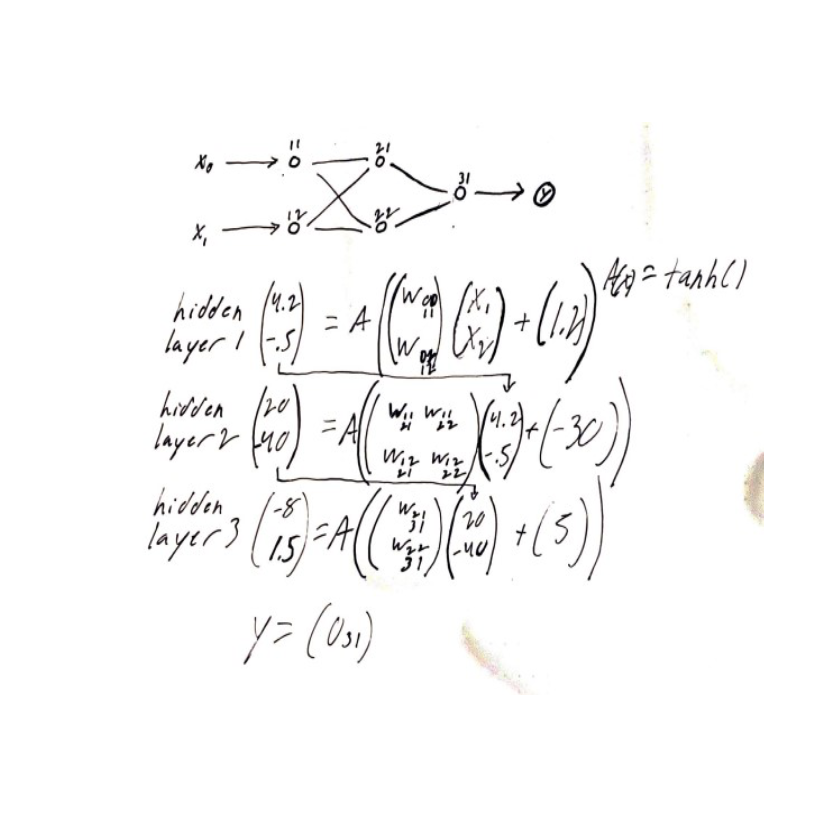

In [ ]:
library(jpeg)
#display the image diagram.jpg using the jpeg library
image = readJPEG("diagram2.jpg")
plot(0, 0, type="n", axes=FALSE, xlab="", ylab="", xlim=c(0, 1), ylim=c(0, 1))
rasterImage(image, 0, 0, 1, 1)

## Part b:

Provide an expression for the output value of the first hidden unit as a function of
the values of the input features. This should have the form h1 = f(x1, x2, . . .) for a suitable
explicit function f.

h1 = tanh(w11*x1 + w21*x2 + b11)


## Part c:

Provide an expression for the value at the output node as a function of the values at the
hidden units. This should have the form z = g(h1, h2, . . .) for a suitable explicit function g.

z = tanh(w1*h1 + w2*h2 + b)

## Part d:

Provide an expression for the value at the output node as a function of the input
values. This should have the form z = F(x1, x2, . . .) for a suitable explicit function F.


No activateion function for an output layer.

z = (w2131, w2231)*h2 + b3

# Problem 5: Analyze the crime rates in the Boston dataset using logistic, LDA, and QDA models

The goal of this problem is to predict the crime rate of neighborhoods using classification methods. In order
to convert your quantitative variable crim to a binary outcome, make 1 or high_crime when crim is greater
than the median crim. Use ten-fold cross-validation for each model type - logistic, LDA, and QDA.

In [ ]:
library(MASS)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
#get the median value for crim
threshold = median(Boston$crim)
#create a new dummy variable from crim where 1 is above the threshold and 0 is below
Boston$crim2 = as.numeric(Boston$crim > threshold)
#make crim2 a factor
Boston$crim2 = as.factor(Boston$crim2)
print(threshold)
head(Boston)

[1] 0.25651


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim2
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [ ]:
#split Boston int train and test sets
indx = sample(1:nrow(Boston), nrow(Boston)*.7)
train = Boston[indx,]
test = Boston[-indx,]

In [ ]:
library(caret)
ctrl = trainControl(method="cv", number=10)

## Part a:

Logistic Regression Method

In [ ]:
#create a 10 fold logistic regression model to predict crim2
log_mod = train(crim2~., data=train, method="glm", family=binomial, trControl=ctrl)
class(log_mod)
print(log_mod)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

[1] "train"         "train.formula"

Generalized Linear Model 

354 samples
 14 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 318, 318, 319, 319, 320, 318, ... 
Resampling results:

  Accuracy  Kappa    
  0.968394  0.9367553



## Part b:

LDA method

In [ ]:
lda_mod = train(crim2~., data=train, method="lda", family=binomial, trControl=ctrl)
class(lda_mod)

[1] "train"         "train.formula"

## Part c:

QDA Method

In [ ]:
qda_mod = train(crim2~., data=train, method="qda", family=binomial, trControl=ctrl)
class(qda_mod)

[1] "train"         "train.formula"

## Part d: 

Compare the results of all three models by plotting all three ROC curves in a single
plot. Also report the area under the curve (AUC) for each method in the plot. Comment on
which model should be chosen.


In [ ]:
library(ROCR)
library(pROC)

Warning message:
"package 'ROCR' was built under R version 4.2.3"

Attaching package: 'ROCR'


The following object is masked from 'package:neuralnet':

    prediction




In [ ]:
#plot each model as a ROC curve on a single plot
pred_log = predict(log_mod, test)
pred_lda = predict(lda_mod, test)
pred_qda = predict(qda_mod, test)

In [ ]:
test_highcrime = as.numeric(test$crim2)
pred_log = as.numeric(pred_log)
pred_lda = as.numeric(pred_lda)
pred_qda = as.numeric(pred_qda)

In [ ]:
roc_log = roc(test_highcrime, pred_log)
roc_lda = roc(test_highcrime, pred_lda)
roc_qda = roc(test_highcrime, pred_qda)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



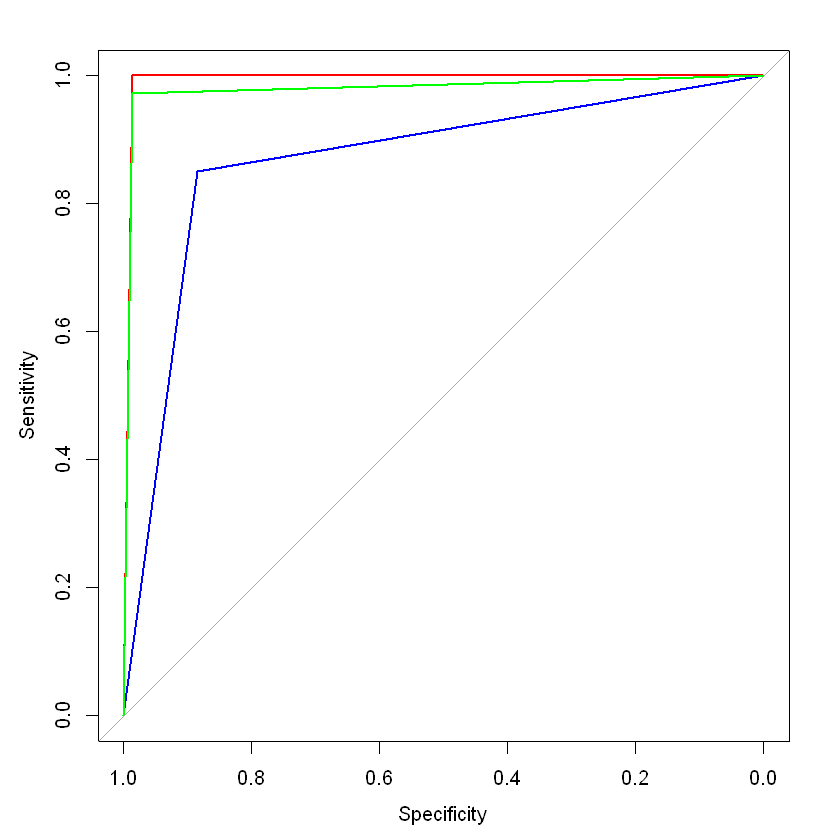

In [ ]:
#plot the ROC curves
plot(roc_log, col="red")
plot(roc_lda, col="blue", add=TRUE)
plot(roc_qda, col="green", add=TRUE)


# Problem 6: Characteristics of LDA and QDA

## Part a:

Suppose that the form of Bayes decision boundary is linear, which is the better
performing model on the training set, LDA or QDA? What about the testing set?

QDA is better on the training set and LDA is better on the testing set. Because QDA has a higher variance it is better on the training set, but because LDA has a lower bias it is better on the testing set. 


## Part b:

 If instead the Bayes decision boundary is non-linear, which model, LDA or QDA, will
perform better on the training set? What about the testing set?

With a non-linear boundary QDA should perform better on both the training and testing set because it has higher variance.

## Part c:

In general, as the sample size n increases, do we expect the test prediction accuracy of
QDA relative to LDA to improve, decline, or be unchanged? Why?

We cant be sure on the accuracy of QDA relative to LDA because it depends on the data. If the data is linear then LDA will be better, but if the data is non-linear then QDA should imporve relative to LDA. This is because QDA has higher variance and LDA has lower bias.

## Part d:

True or False: Even if the Bayes decision boundary for a given problem is linear, we
will probably achieve a superior test error rate using QDA rather than LDA because QDA is
flexible enough to model a linear decision boundary. Justify your answer.

False: a linear model does not depend on flexability to model a linear decision boundary, its just one factor. 